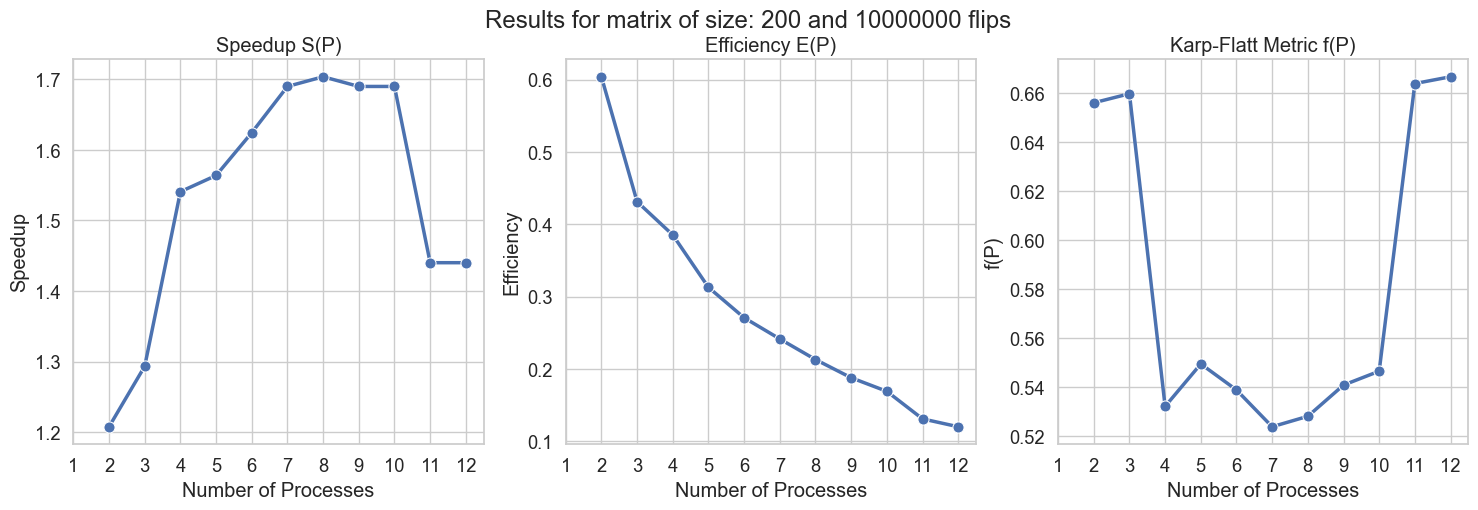

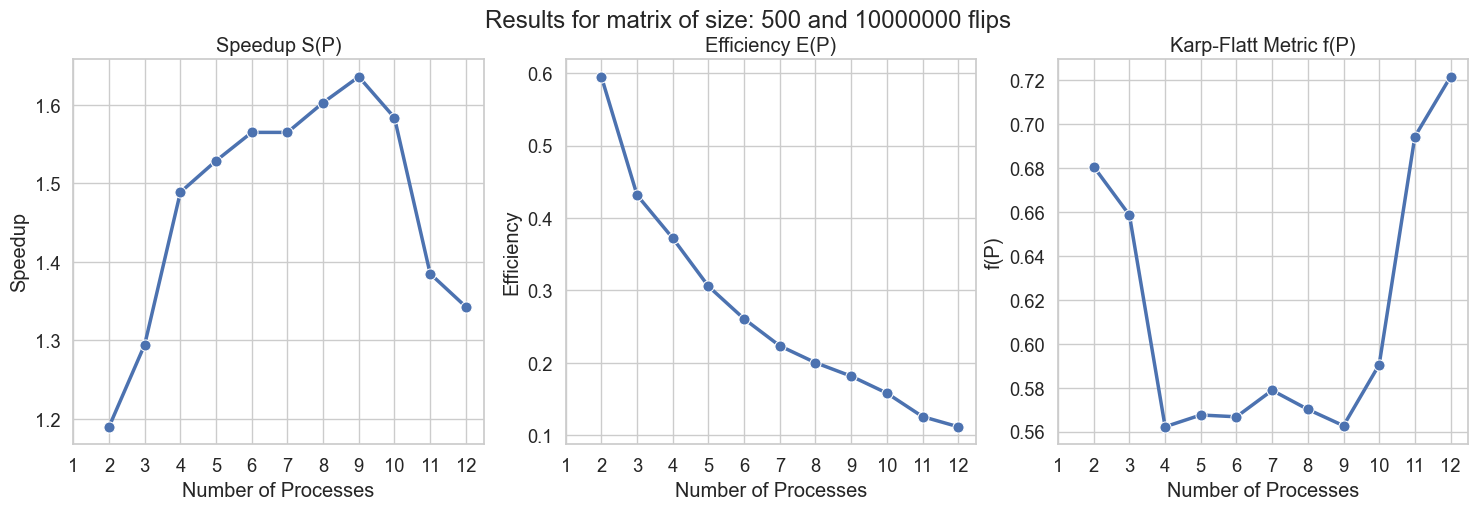

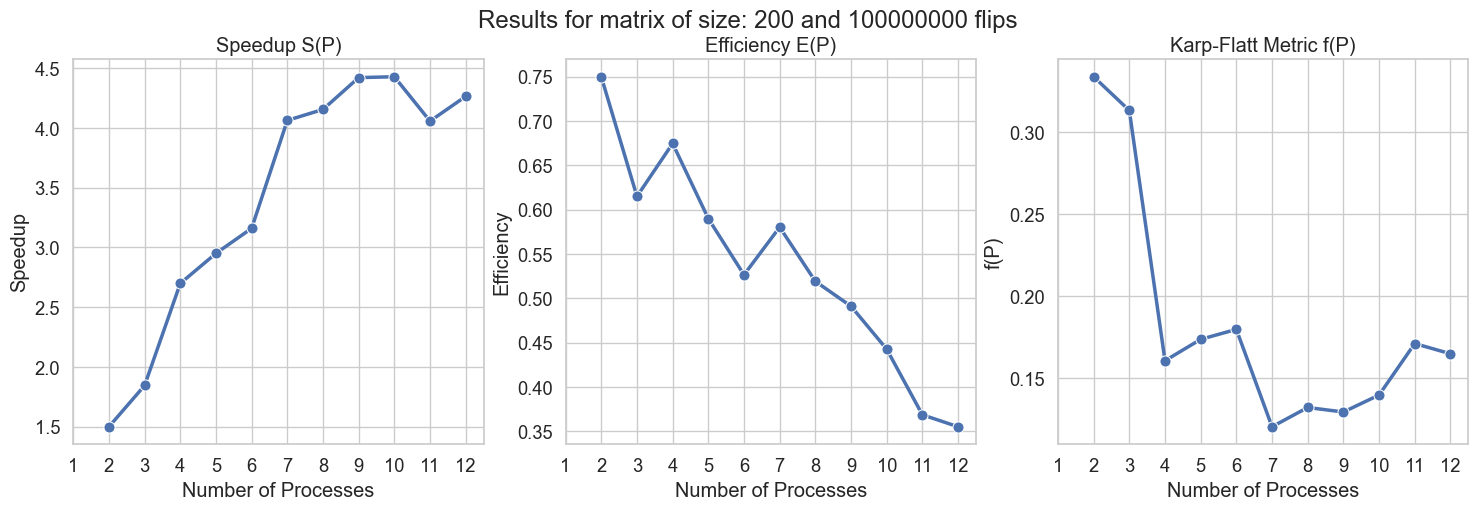

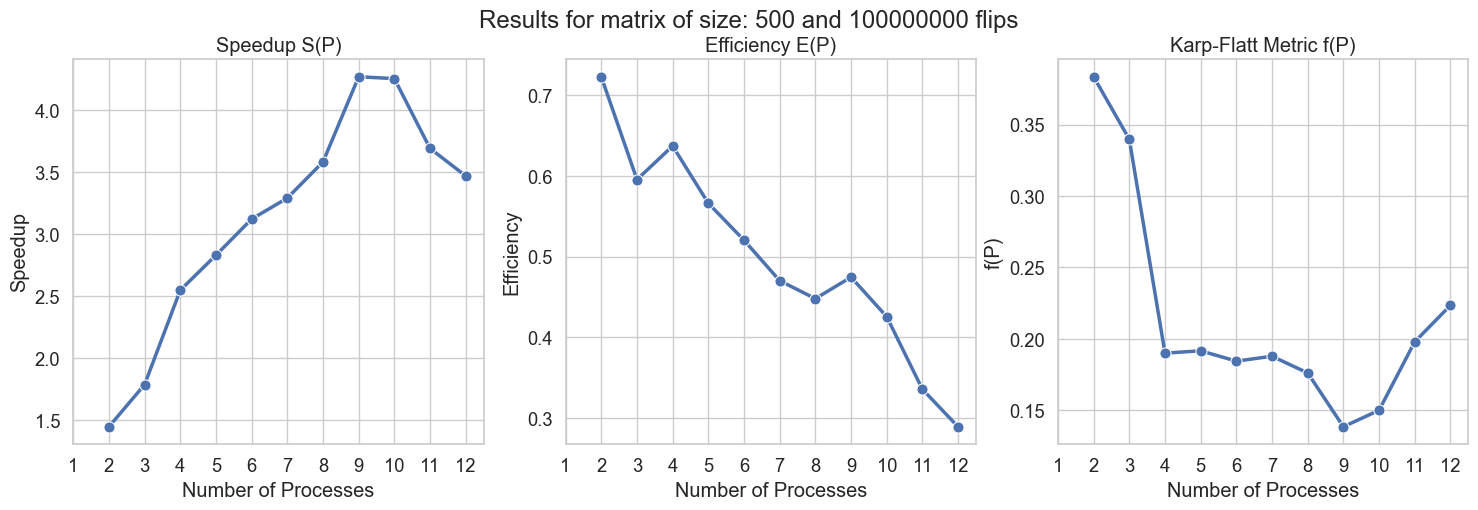

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv("ising_times.csv")

def plot_line(rest: pd.DataFrame, y: str, y_label: str, title: str, ax):

    sns.lineplot(
        data=rest, x="nproc", y=y,
        marker="o", linewidth=2.5, markersize=8, ax=ax
    )
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.set_xlabel("Number of Processes")
    ax.set_xticks(df["nproc"].unique())


grid_sizes = [200, 500]
total_flips = [10_000_000, 100_000_000]

for flip_count in total_flips:
    for grid_size in grid_sizes:
        per_proc_time = df[(df["grid_size"] == grid_size) & (df["total_flips"] == flip_count)]

        one_proc = per_proc_time["nproc"] == 1
        base_time = per_proc_time[one_proc]["time_sec"].item()

        rest = per_proc_time[~one_proc].copy()
        rest["SP"] = base_time / rest["time_sec"]
        rest["EP"] = rest["SP"] / rest["nproc"]
        rest["fp"] = (1/rest["SP"] - (1/rest["nproc"])) / (1 - (1/rest["nproc"]))

        sns.set_theme(style="whitegrid", font_scale=1.2)
        fig, axes = plt.subplots(1, 3, figsize=(18,5))

        fig.suptitle(f"Results for matrix of size: {grid_size} and {flip_count} flips")

        plot_line(rest, "SP", "Speedup", "Speedup S(P)", axes[0])
        plot_line(rest, "EP", "Efficiency", "Efficiency E(P)", axes[1])
        plot_line(rest, "fp", "f(P)", "Karp-Flatt Metric f(P)", axes[2])

        plt.show()